In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import  itertools

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [180]:
with open("../code/build/Release/compare_sl_om.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)

df['cpu_time_ms'] = df['cpu_time'] / 1e6
df['RAM'] = df['RAM'].astype(int)

df.drop(inplace=True, columns=['cpu_time', 'iterations', 'real_time', 'family_index', 'per_family_instance_index', 'repetitions', 'repetition_index', 'threads', 'time_unit', 'Page', 'items_per_second', 'run_type', 'run_name'])


df['n'] = df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
df['name'] = df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df['operation'] = df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
df['name'] = df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

df.rename(columns={
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
}, inplace=True)

df

,name,Physical Memory Usage (KB),CPU Time (ms),n,operation
0,SkipList,0,0.000114,8,Insertion
1,SkipList,0,0.000176,16,Insertion
2,SkipList,0,0.000578,32,Insertion
3,SkipList,0,0.001196,64,Insertion
4,SkipList,0,0.003247,128,Insertion
...,...,...,...,...,...
83,OrderedMap,68,273.437500,524288,Search
84,OrderedMap,23996,890.625000,1048576,Search
85,OrderedMap,49152,2187.500000,2097152,Search
86,OrderedMap,98832,5453.125000,4194304,Search


In [181]:
names = df['name'].unique().tolist()
operations = df['operation'].unique()
exclude_columns = ['name', 'n', 'operation', 'b']
print(names, operations)

['SkipList', 'OrderedMap'] ['Insertion' 'Search']


In [182]:
df_sl = df[df['name'] == 'SkipList']
df_om = df[df['name'] == 'OrderedMap']

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


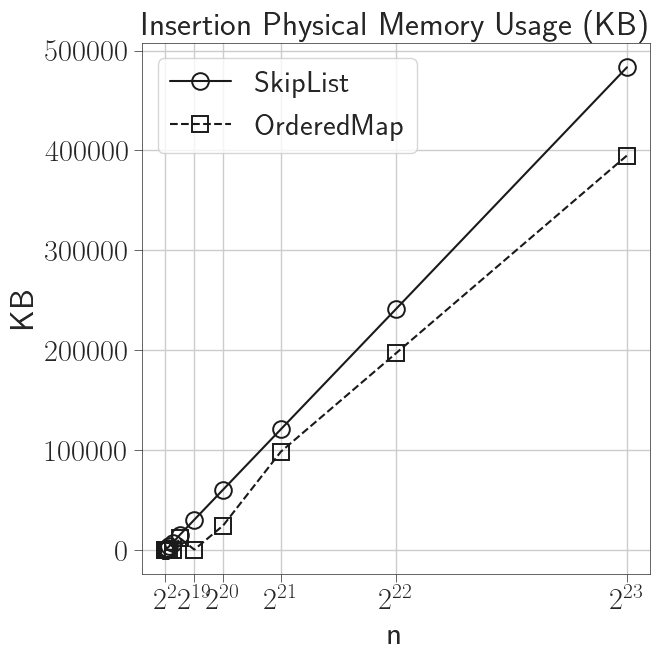

bt CPU Time (ms)
om CPU Time (ms)


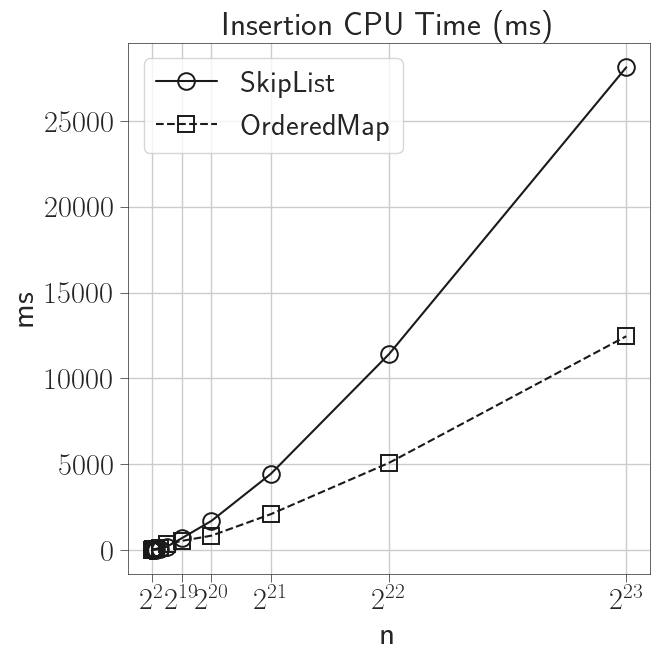

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


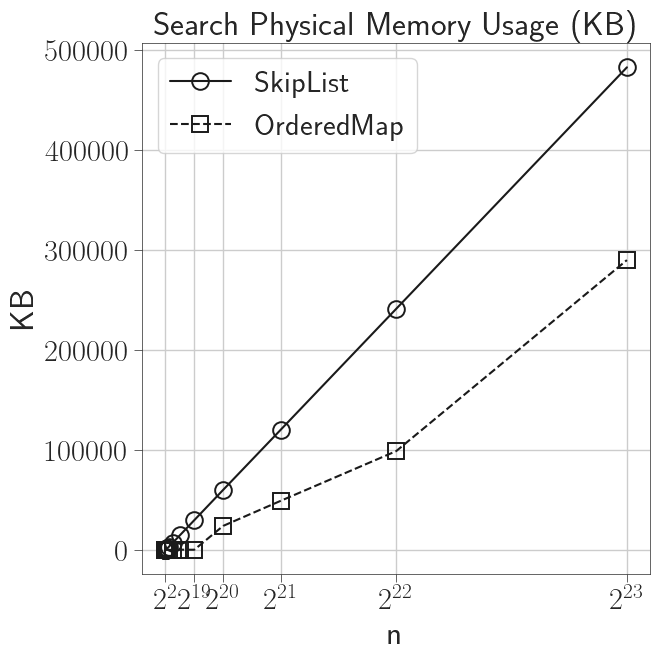

bt CPU Time (ms)
om CPU Time (ms)


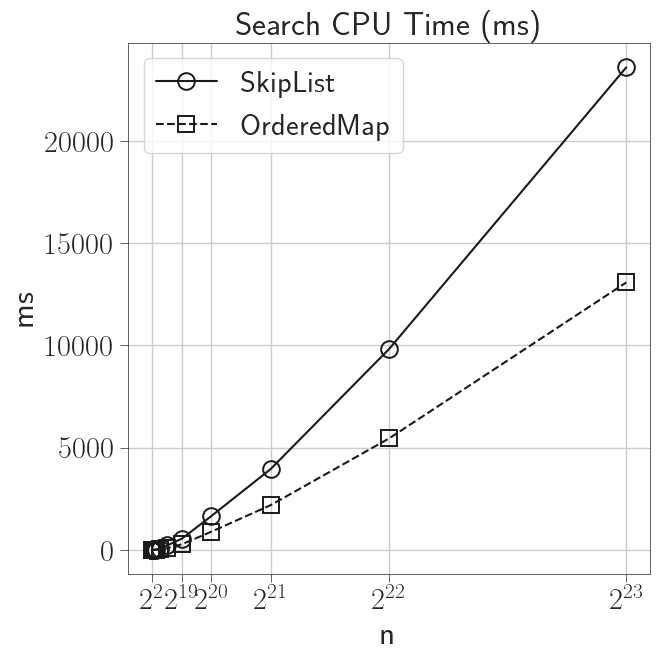

In [183]:

from matplotlib.ticker import FuncFormatter
def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'


markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label= f'SkipList',
                ax=ax
            )

            print(f'om {column}')
            sns.lineplot(
                data=df_om_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            plt.xticks( [2**2] + list(df_sl['n'].unique())[16:])
            ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)




            plt.tight_layout()
            plt.savefig('plot/' 'sl_' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


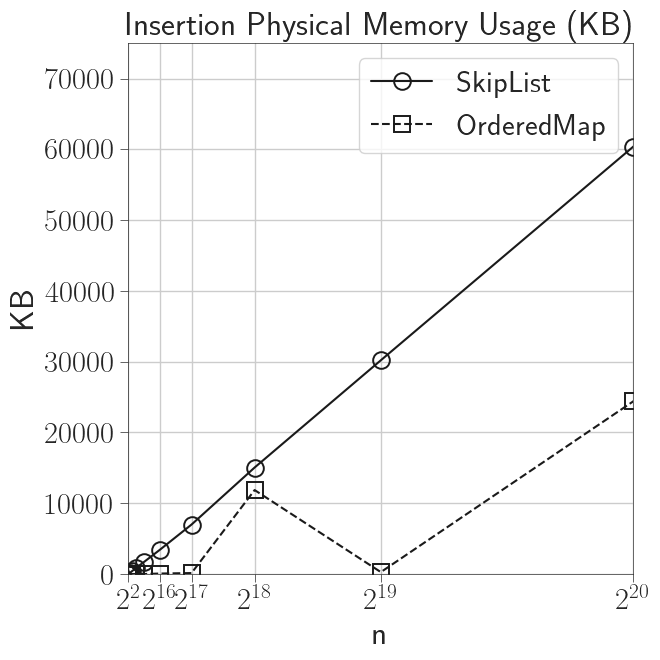

bt CPU Time (ms)
om CPU Time (ms)


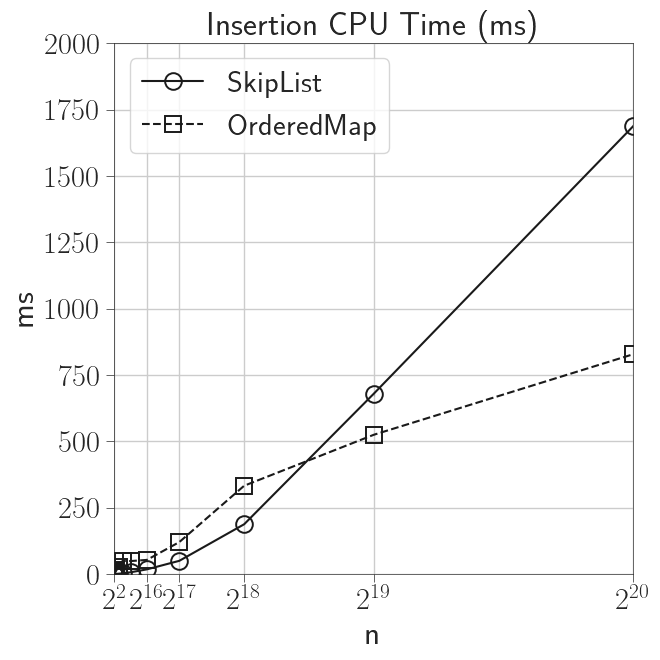

bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


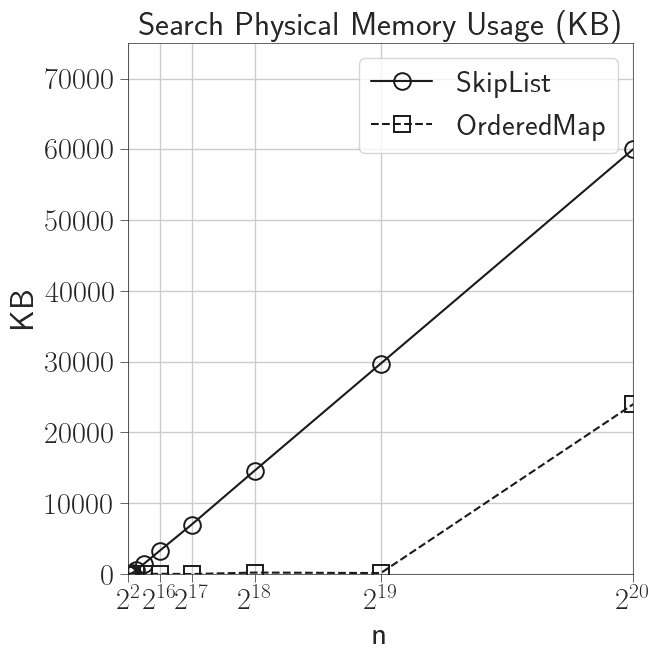

bt CPU Time (ms)
om CPU Time (ms)


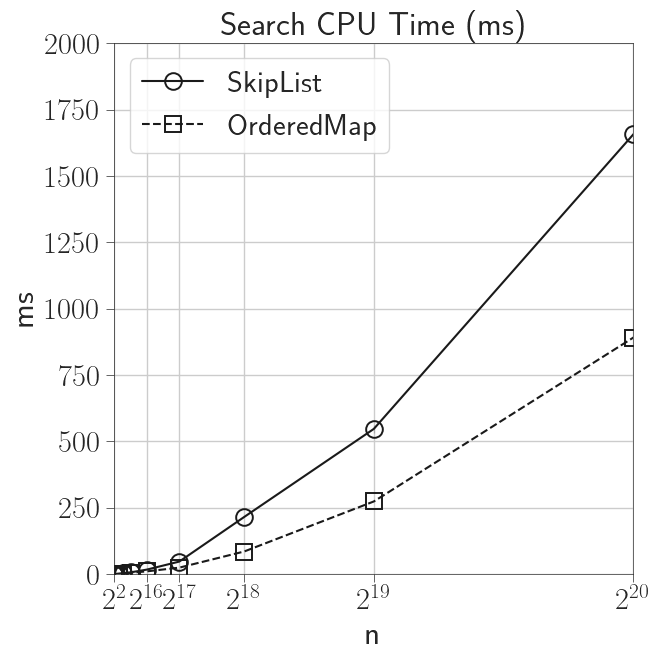

In [184]:
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label= f'SkipList',
                ax=ax
            )

            print(f'om {column}')
            sns.lineplot(
                data=df_om_ops,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.xticks( [2**2] + list(df_sl['n'].unique())[13:])
            ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            plt.xlim([0, 2**20])

            if "Memory" in column:
                plt.ylim([0, 7.5E4])
            else:
                plt.ylim([0, 2E3])


            plt.tight_layout()
            plt.savefig('plot/' 'sl_lim' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()

In [185]:
with open("../code/build/Release/sl_over_ml.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)

df['cpu_time_ms'] = df['cpu_time'] / 1e6
df['RAM'] = df['RAM'].astype(int)

df.drop(inplace=True, columns=['cpu_time', 'iterations', 'real_time', 'family_index', 'per_family_instance_index', 'repetitions', 'repetition_index', 'threads', 'time_unit', 'Page', 'items_per_second', 'run_type', 'run_name'])


df['n'] = df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
df['name'] = df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df['operation'] = df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
df['max level'] = pd.to_numeric(df['name'].str.extract(r'<(\d+)>')[0])
df['name'] = df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

df.rename(columns={
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
}, inplace=True)

df

,name,Physical Memory Usage (KB),CPU Time (ms),n,operation,max level
0,SkipList,6888,30250.000000,131072,Insertion,2
1,SkipList,7232,2906.250000,131072,Insertion,4
2,SkipList,7424,765.625000,131072,Insertion,6
3,SkipList,7480,296.875000,131072,Insertion,8
4,SkipList,7456,131.696429,131072,Insertion,10
5,SkipList,7424,58.593750,131072,Insertion,12
6,SkipList,7416,46.875000,131072,Insertion,14
7,SkipList,7404,65.340909,131072,Insertion,16
8,SkipList,7440,53.977273,131072,Insertion,18
9,SkipList,7484,50.000000,131072,Insertion,20


['SkipList'] ['Insertion' 'Search']
bt Physical Memory Usage (KB)


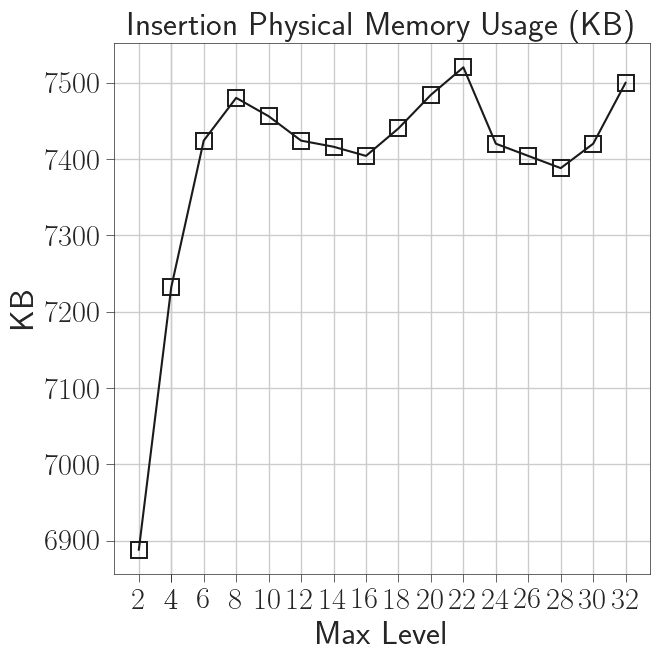

bt CPU Time (ms)


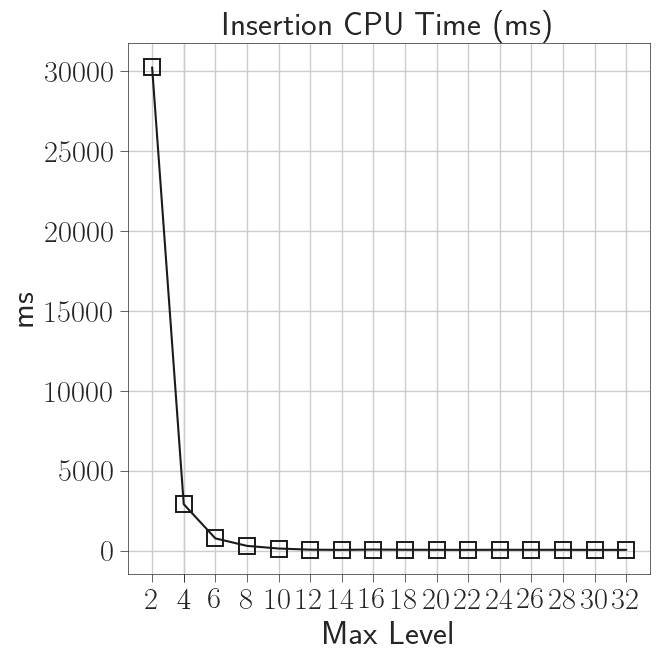

bt Physical Memory Usage (KB)


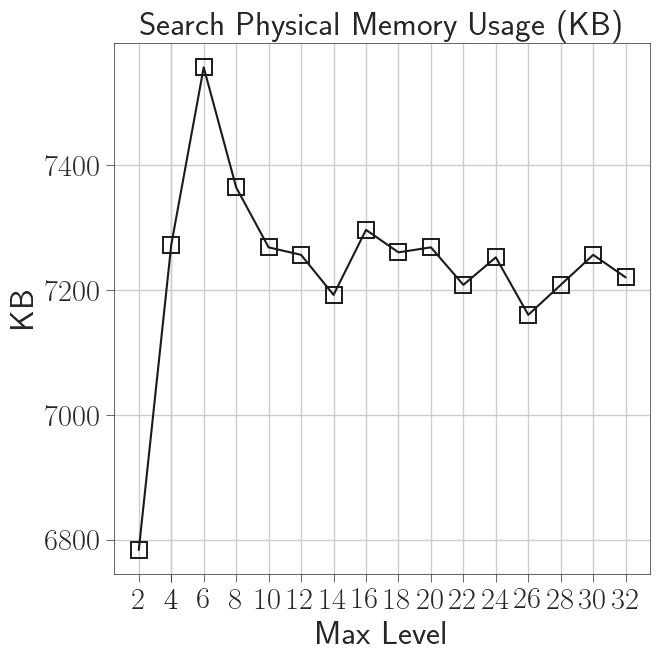

bt CPU Time (ms)


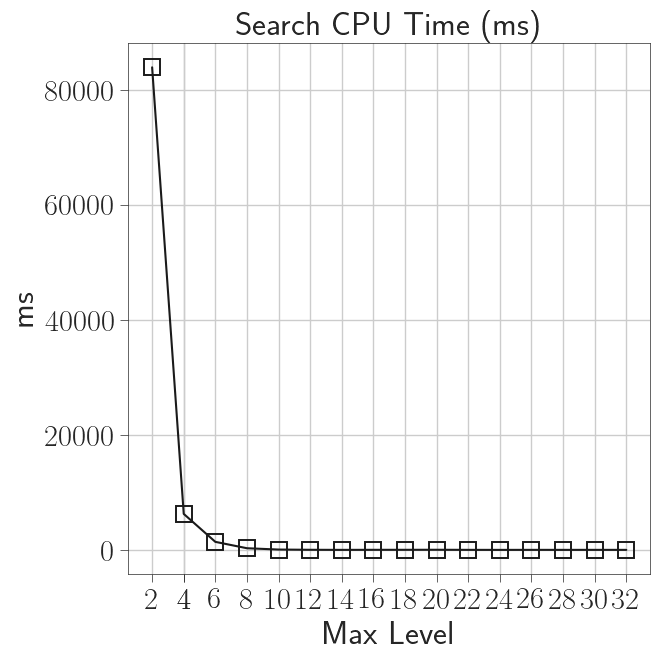

In [186]:
names = df['name'].unique().tolist()
operations = df['operation'].unique()
exclude_columns = ['name', 'n', 'operation', 'b', 'max level']
print(names, operations)
df_sl = df[df['name'] == 'SkipList']

from matplotlib.ticker import FuncFormatter
def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'


markers = ['s', 'o', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_sl_ops = df_sl[df_sl['operation'] == op]
    df_om_ops = df_om[df_om['operation'] == op]

    for column in df_sl.columns:
        if column not in exclude_columns:
            fig, ax = plt.subplots(figsize=(7,7))

            marker_cyc = itertools.cycle(markers)

            print(f'bt {column}')
            sns.lineplot(
                data=df_sl_ops,
                x='max level',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                # label= f'SkipList',
                ax=ax
            )


            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('Max Level')

            plt.xticks( [2**2] + list(df_sl['max level'].unique()))
            # ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

            if "Normalized" in column:
                ax.set_ylabel("Normalized Value")
            elif "(" in column:
                ax.set_ylabel(f"{column}".split('(')[1].split(')')[0])
            else:
                ax.set_ylabel(column)

            ax.grid(True)
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)


            plt.tight_layout()
            plt.savefig('plot/' 'sl_maxlevel_' +ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()